# Neural Network Modelling

## Imports

In [547]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras import layers
from keras.preprocessing import sequence
from tensorflow.python.keras import Sequential
from keras.models import load_model
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix

import pickle

In [406]:
sns.set_context('poster')

In [407]:
# import zipped data
from zipfile import ZipFile 

data = "data.zip"

In [ ]:
#Unzip data
!unzip -q data.zip

replace data/sentiment_dataset_dev.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [549]:
# Load Dataset to the Dataframe
df_train = pd.read_csv('./data/sentiment_dataset_train.csv')
df_dev = pd.read_csv('./data/sentiment_dataset_dev.csv')
df_test = pd.read_csv('./data/sentiment_dataset_test.csv')

In [550]:
df_train.shape, df_dev.shape, df_test.shape

((35005, 3), (7499, 3), (6500, 2))

In [551]:
df_train.rating.unique()

array(['4', '2', '3', '1', '5',
       'Tables not made up prior to guest seating. 2.'], dtype=object)

In [552]:
df_train.drop(df_train.index[df_train['rating'] == 'Tables not made up prior to guest seating. 2.'], inplace = True)

In [553]:
df_train.rating.unique()

array(['4', '2', '3', '1', '5'], dtype=object)

## One Hot Encoding Scores Column

I needed the target variable to be one hot encoded, as the output layer would have 5 nodes, 1 for each rating.

In [554]:
# Training Dataset
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df_train[['rating']]).toarray())

df_train = df_train.join(enc_df)
df_train.head()

id                                             review rating  ...    2    3    4
0   0  Arrived about 10pm and check in was painless. ...      4  ...  0.0  1.0  0.0
1   1  I checked in at 4pm even tough room was not re...      2  ...  0.0  0.0  0.0
2   2  I chose this hotel, as it was in a good locati...      2  ...  0.0  0.0  0.0
3   3  Great location, super close to shops & a 10min...      4  ...  0.0  1.0  0.0
4   4  I was in the Sir Adam Hotel to visit a friend....      3  ...  1.0  0.0  0.0

[5 rows x 8 columns]

In [556]:
# Training Dataset
df_train = df_train.rename(columns={0: 'rating_1', 1:'rating_2',2:'rating_3',3:'rating_4',4:'rating_5'})

In [557]:
df_train.head()

id                                             review  ... rating_4  rating_5
0   0  Arrived about 10pm and check in was painless. ...  ...      1.0       0.0
1   1  I checked in at 4pm even tough room was not re...  ...      0.0       0.0
2   2  I chose this hotel, as it was in a good locati...  ...      0.0       0.0
3   3  Great location, super close to shops & a 10min...  ...      1.0       0.0
4   4  I was in the Sir Adam Hotel to visit a friend....  ...      0.0       0.0

[5 rows x 8 columns]

In [558]:
# Dev Dataset
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df_dev[['rating']]).toarray())

df_dev = df_dev.join(enc_df)
df_dev.head()

id                                             review  rating  ...    2    3    4
0   0  The hotel position is very good, center of the...       2  ...  0.0  0.0  0.0
1   1  Not a very big room but very comfortable and c...       4  ...  0.0  1.0  0.0
2   2  The hotel is located near Kurfürstendamm in a ...       4  ...  0.0  1.0  0.0
3   3  My booking was for 2 rooms and I have made the...       2  ...  0.0  0.0  0.0
4   4  Excellent hotel, fantastic swimming pool, very...       5  ...  0.0  0.0  1.0

[5 rows x 8 columns]

In [559]:
# Dev Dataset
df_dev = df_dev.rename(columns={0: 'rating_1', 1:'rating_2',2:'rating_3',3:'rating_4',4:'rating_5'})
df_dev.head()

id                                             review  ...  rating_4  rating_5
0   0  The hotel position is very good, center of the...  ...       0.0       0.0
1   1  Not a very big room but very comfortable and c...  ...       1.0       0.0
2   2  The hotel is located near Kurfürstendamm in a ...  ...       1.0       0.0
3   3  My booking was for 2 rooms and I have made the...  ...       0.0       0.0
4   4  Excellent hotel, fantastic swimming pool, very...  ...       0.0       1.0

[5 rows x 8 columns]

In [560]:
y_train

rating_1  rating_2  rating_3  rating_4  rating_5
15885       0.0       0.0       0.0       1.0       0.0
8986        1.0       0.0       0.0       0.0       0.0
32703       0.0       1.0       0.0       0.0       0.0
11765       0.0       1.0       0.0       0.0       0.0
22897       0.0       0.0       1.0       0.0       0.0
...         ...       ...       ...       ...       ...
16850       0.0       0.0       0.0       0.0       1.0
6265        0.0       0.0       0.0       0.0       1.0
11284       0.0       0.0       1.0       0.0       0.0
860         0.0       0.0       1.0       0.0       0.0
15795       1.0       0.0       0.0       0.0       0.0

[26253 rows x 5 columns]

## Assining Training, Development & Test Data

Assign training, development and test data to their respective x and y. 

In [561]:
x_train, y_train = (df_train[['review']], df_train[['rating_1','rating_2','rating_3','rating_4','rating_5']])
x_test, y_test = (df_dev[['review']], df_dev[['rating_1','rating_2','rating_3','rating_4','rating_5']])
X_test = (df_test[['review']])

In [562]:
x_train.head()

review
0  Arrived about 10pm and check in was painless. ...
1  I checked in at 4pm even tough room was not re...
2  I chose this hotel, as it was in a good locati...
3  Great location, super close to shops & a 10min...
4  I was in the Sir Adam Hotel to visit a friend....

In [563]:
x_test.head()

review
0  The hotel position is very good, center of the...
1  Not a very big room but very comfortable and c...
2  The hotel is located near Kurfürstendamm in a ...
3  My booking was for 2 rooms and I have made the...
4  Excellent hotel, fantastic swimming pool, very...

In [564]:
X_test.head()

review
0  Not at all what expected.   Our mountain view ...
1  Good location as we needed to head to Reims th...
2  Me and my son just returned from Broadmoor Mia...
3  The place was filthy and full of stoned backpa...
4  The hotel itself is really nice and modern whi...

In [565]:
y_test.head()

rating_1  rating_2  rating_3  rating_4  rating_5
0       0.0       1.0       0.0       0.0       0.0
1       0.0       0.0       0.0       1.0       0.0
2       0.0       0.0       0.0       1.0       0.0
3       0.0       1.0       0.0       0.0       0.0
4       0.0       0.0       0.0       0.0       1.0

In [566]:
y_train

rating_1  rating_2  rating_3  rating_4  rating_5
0           0.0       0.0       0.0       1.0       0.0
1           0.0       1.0       0.0       0.0       0.0
2           0.0       1.0       0.0       0.0       0.0
3           0.0       0.0       0.0       1.0       0.0
4           0.0       0.0       1.0       0.0       0.0
...         ...       ...       ...       ...       ...
35000       0.0       0.0       1.0       0.0       0.0
35001       0.0       0.0       1.0       0.0       0.0
35002       0.0       0.0       1.0       0.0       0.0
35003       0.0       0.0       1.0       0.0       0.0
35004       NaN       NaN       NaN       NaN       NaN

[35004 rows x 5 columns]

## Removing Punctuation and Tokenizing Review Column

In [567]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

In [568]:
def text_cleanup(text):
  
  token_list = tokenizer.tokenize(text.lower())
  new_text = ''
  for word in token_list:
    new_text += word + ' '
        
  return new_text

In [569]:
x_train['review_cleaned'] = x_train['review'].apply(text_cleanup)
x_test['review_cleaned'] = x_test['review'].apply(text_cleanup)
X_test['review_cleaned'] = X_test['review'].apply(text_cleanup)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [570]:
x_train.head()

review                                     review_cleaned
0  Arrived about 10pm and check in was painless. ...  arrived about pm and check in was painless the...
1  I checked in at 4pm even tough room was not re...  i checked in at pm even tough room was not rea...
2  I chose this hotel, as it was in a good locati...  i chose this hotel as it was in a good locatio...
3  Great location, super close to shops & a 10min...  great location super close to shops a min walk...
4  I was in the Sir Adam Hotel to visit a friend....  i was in the sir adam hotel to visit a friend ...

In [571]:
x_test

review                                     review_cleaned
0     The hotel position is very good, center of the...  the hotel position is very good center of the ...
1     Not a very big room but very comfortable and c...  not a very big room but very comfortable and c...
2     The hotel is located near Kurfürstendamm in a ...  the hotel is located near kurf rstendamm in a ...
3     My booking was for 2 rooms and I have made the...  my booking was for rooms and i have made the b...
4     Excellent hotel, fantastic swimming pool, very...  excellent hotel fantastic swimming pool very w...
...                                                 ...                                                ...
7494  we stayed here earlier this month with another...  we stayed here earlier this month with another...
7495  We stayed 3 nights at this hotel.   The staff ...  we stayed nights at this hotel the staff in ge...
7496  Our first night here, a large group of Guests ...  our first night here a large group of guests h...
7497  Arrived here on Thursday 14th with 5 other peo...  arrived here on thursday th with other people ...
7498  I had a wonderful 5 night stay at the Hotel l'...  i had a wonderful night stay at the hotel l ol...

[7499 rows x 2 columns]

In [572]:
X_test

review                                     review_cleaned
0     Not at all what expected.   Our mountain view ...  not at all what expected our mountain view was...
1     Good location as we needed to head to Reims th...  good location as we needed to head to reims th...
2     Me and my son just returned from Broadmoor Mia...  me and my son just returned from broadmoor mia...
3     The place was filthy and full of stoned backpa...  the place was filthy and full of stoned backpa...
4     The hotel itself is really nice and modern whi...  the hotel itself is really nice and modern whi...
...                                                 ...                                                ...
6495  The building is a superb one, pretty nice gard...  the building is a superb one pretty nice garde...
6496  I stayed here as part of a 3 day family trip t...  i stayed here as part of a day family trip to ...
6497  We stayed in this hotel for 2 nights (couple +...  we stayed in this hotel for nights couple teen...
6498  I have previously felt that the Intercontinent...  i have previously felt that the intercontinent...
6499  We booked this hotel on Expedia because of its...  we booked this hotel on expedia because of its...

[6500 rows x 2 columns]

Appending Development & Testing Dataset to the Training to Create a Dictionary

In [573]:
# to append df2 at the end of df1 dataframe 
df = x_train.append([x_test],[X_test]) 
df

review                                     review_cleaned
0      Arrived about 10pm and check in was painless. ...  arrived about pm and check in was painless the...
1      I checked in at 4pm even tough room was not re...  i checked in at pm even tough room was not rea...
2      I chose this hotel, as it was in a good locati...  i chose this hotel as it was in a good locatio...
3      Great location, super close to shops & a 10min...  great location super close to shops a min walk...
4      I was in the Sir Adam Hotel to visit a friend....  i was in the sir adam hotel to visit a friend ...
...                                                  ...                                                ...
42498  we stayed here earlier this month with another...  we stayed here earlier this month with another...
42499  We stayed 3 nights at this hotel.   The staff ...  we stayed nights at this hotel the staff in ge...
42500  Our first night here, a large group of Guests ...  our first night here a large group of guests h...
42501  Arrived here on Thursday 14th with 5 other peo...  arrived here on thursday th with other people ...
42502  I had a wonderful 5 night stay at the Hotel l'...  i had a wonderful night stay at the hotel l ol...

[42503 rows x 2 columns]

In [574]:
df.describe()

review review_cleaned
count    42503          42503
unique   42493          42493
top     #NAME?          name 
freq        11             11

## Creating a Dictionary With Words That Appear in Reviews and an Index

I created an index for each word in the training review dataset, so when passed through the embedding layer of the neural network there is an indexed number associated with each word.

In [575]:
flat_review = " ".join(df['review_cleaned'].values)
flat_review = flat_review.lower().split()

In [576]:
len(flat_review)

4169468

In [577]:
unique_list = []
for word in flat_review:
    if word not in unique_list:
        unique_list.append(word)

In [578]:
len(unique_list)

39028

In [579]:
word_index_dict = {}
for i in range(0,len(unique_list)):
    word_index_dict[unique_list[i]] = i  

I added 4 other items to the dictionary that represented padding, the start of the review, unknown words, and unused words.

In [580]:
word_index_dict = {k:(v+4) for k,v in word_index_dict.items()}
word_index_dict['<PAD>'] = 0
word_index_dict['<START>'] = 1
word_index_dict['<UNK>'] = 2
word_index_dict['<UNUSED>'] = 3

## Indexing Words in Reviews Using Dictionary

In [581]:
def index_review_words(text):
    review_word_list = []
    for word in text.lower().split():
        if word in word_index_dict.keys():
            review_word_list.append(word_index_dict[word])
        else:
            review_word_list.append(word_index_dict['<UNK>'])

    return review_word_list 

In [582]:
x_train['preprocessed_review'] = x_train['review_cleaned'].apply(index_review_words)
x_test['preprocessed_review'] = x_test['review_cleaned'].apply(index_review_words)
X_test['preprocessed_review'] = X_test['review_cleaned'].apply(index_review_words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [583]:
x_train.head()

review  ...                                preprocessed_review
0  Arrived about 10pm and check in was painless. ...  ...  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
1  I checked in at 4pm even tough room was not re...  ...  [98, 99, 9, 89, 6, 100, 101, 73, 10, 102, 103,...
2  I chose this hotel, as it was in a good locati...  ...  [98, 148, 16, 17, 149, 110, 10, 9, 24, 53, 27,...
3  Great location, super close to shops & a 10min...  ...  [211, 27, 212, 213, 15, 214, 24, 215, 91, 15, ...
4  I was in the Sir Adam Hotel to visit a friend....  ...  [98, 10, 9, 12, 257, 258, 17, 15, 259, 24, 260...

[5 rows x 3 columns]

In [584]:
x_test.head()

review  ...                                preprocessed_review
0  The hotel position is very good, center of the...  ...  [12, 17, 2633, 18, 134, 53, 1543, 36, 12, 1814...
1  Not a very big room but very comfortable and c...  ...  [102, 24, 134, 1217, 73, 169, 134, 571, 7, 292...
2  The hotel is located near Kurfürstendamm in a ...  ...  [12, 17, 18, 770, 475, 2298, 2299, 9, 24, 398,...
3  My booking was for 2 rooms and I have made the...  ...  [114, 599, 10, 23, 52, 7, 98, 161, 601, 12, 59...
4  Excellent hotel, fantastic swimming pool, very...  ...  [319, 17, 633, 2166, 476, 134, 801, 970, 211, ...

[5 rows x 3 columns]

In [585]:
X_test.head()

review  ...                                preprocessed_review
0  Not at all what expected.   Our mountain view ...  ...  [102, 89, 158, 159, 579, 250, 4796, 266, 10, 3...
1  Good location as we needed to head to Reims th...  ...  [53, 27, 149, 145, 1661, 15, 1432, 15, 2, 12, ...
2  Me and my son just returned from Broadmoor Mia...  ...  [113, 7, 114, 3228, 439, 1665, 223, 2, 2000, 9...
3  The place was filthy and full of stoned backpa...  ...  [12, 39, 10, 3230, 7, 684, 36, 8034, 5003, 579...
4  The hotel itself is really nice and modern whi...  ...  [12, 17, 338, 18, 528, 499, 7, 763, 165, 1842,...

[5 rows x 3 columns]

In [586]:
x_train['preprocessed_review'].describe()

count      35004
unique     34997
top       [1434]
freq           8
Name: preprocessed_review, dtype: object

In [587]:
y_train

rating_1  rating_2  rating_3  rating_4  rating_5
0           0.0       0.0       0.0       1.0       0.0
1           0.0       1.0       0.0       0.0       0.0
2           0.0       1.0       0.0       0.0       0.0
3           0.0       0.0       0.0       1.0       0.0
4           0.0       0.0       1.0       0.0       0.0
...         ...       ...       ...       ...       ...
35000       0.0       0.0       1.0       0.0       0.0
35001       0.0       0.0       1.0       0.0       0.0
35002       0.0       0.0       1.0       0.0       0.0
35003       0.0       0.0       1.0       0.0       0.0
35004       NaN       NaN       NaN       NaN       NaN

[35004 rows x 5 columns]

## Modelling

### Add Padding to Reviews and Capping Reviews to Length 250 Words

In [588]:
x_train = sequence.pad_sequences(x_train['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=100)
x_test = sequence.pad_sequences(x_test['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=100)
X_test = sequence.pad_sequences(X_test['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=100)

In [589]:
y_train
y_train.shape

(35004, 5)

In [590]:
x_test.shape

(7499, 100)

In [591]:
x_train

array([[ 40,  17,  41, ...,  96,  97,  15],
       [ 98,  99,   9, ...,   0,   0,   0],
       [169, 150,  10, ..., 210, 197,  98],
       ...,
       [ 12,  17,  18, ...,   0,   0,   0],
       [238,  18,  24, ...,  12, 276, 723],
       [ 12, 104,  10, ...,   0,   0,   0]], dtype=int32)

In [592]:
x_test

array([[  12,   17, 2633, ...,    0,    0,    0],
       [ 102,   24,  134, ...,    0,    0,    0],
       [  12,   17,   18, ...,    0,    0,    0],
       ...,
       [ 453, 1821,   38, ..., 2947, 2651,  114],
       [2784,    5,   12, ...,   15,  292,  612],
       [  98,  226,   24, ...,    0,    0,    0]], dtype=int32)

In [593]:
X_test

array([[ 5148,   368,  3998, ..., 11831,   697,    24],
       [   18,   598,  1788, ...,   468,   225,  2603],
       [ 1350,    89,    12, ...,   250,  3550,    12],
       ...,
       [   24,    73,   184, ...,    24,   336,  5196],
       [  223,    12,   806, ...,   110,  3792,    88],
       [  288,   150,    10, ...,    12,   649,   165]], dtype=int32)

### Creating and Training Neural Network Model

Here I created a neural network model with 1 embedding layer for the 35635 unique words (including the extra 4 from padding etc.), 1 dense layer with 16 nodes, and one output layer with 5 nodes for each score.

In [605]:
model = Sequential()
model.add(Embedding(39032,16))
model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

In [606]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [607]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.25,random_state=42)

In [608]:
history = model.fit(x_train,y_train,epochs=30,batch_size=250,validation_data=(x_val,y_val),verbose=0)

## Testing Model

In [609]:
results = model.evaluate(x_val,y_val)

154/154 [==============================] - 0s 2ms/step - loss: 1.1039 - accuracy: 0.6082


In [610]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

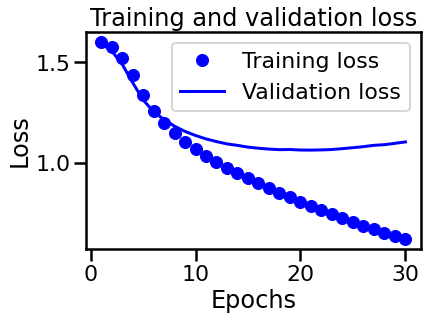

In [611]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Evaluating Development & Test Dataset

In [612]:
model.evaluate(x_test,y_test)

235/235 [==============================] - 0s 2ms/step - loss: 0.8781 - accuracy: 0.6313


[0.87810879945755, 0.6312841773033142]

In [613]:
y_predD = model.predict(x_test)
print(y_predD)

[[2.54518673e-04 3.89210065e-03 8.46200250e-03 1.55537075e-03
  9.23319822e-05]
 [1.85110795e-04 1.00040634e-04 5.19531139e-04 5.13625983e-03
  3.30228265e-03]
 [1.51596862e-04 1.33997964e-04 1.17828802e-03 1.07478304e-02
  4.97219572e-03]
 ...
 [3.36589105e-03 3.12975496e-02 9.76524409e-03 4.61563613e-04
  6.09538401e-05]
 [2.14925921e-03 5.88329323e-03 2.58425251e-03 4.18165786e-04
  1.38060568e-04]
 [1.02894974e-03 4.51815777e-06 3.67071771e-05 2.13481430e-02
  5.74432015e-01]]


In [614]:
y_predT = model.predict(X_test)
print(y_predT)

[[1.9531976e-03 2.3778861e-03 1.5893060e-03 1.1011763e-03 5.8643188e-04]
 [1.2538490e-03 6.0459333e-05 2.1649676e-04 9.2678554e-03 7.2549567e-02]
 [9.3471045e-03 4.0367795e-03 4.4719072e-04 1.2397756e-04 1.9360099e-04]
 ...
 [1.7277895e-05 1.0890410e-03 2.5539923e-02 1.3215905e-02 2.6321900e-04]
 [2.1535506e-02 7.2228895e-03 7.3518005e-04 4.2155015e-04 7.5241225e-04]
 [1.4366742e-02 1.3490124e-01 7.3817861e-03 8.7316541e-05 9.5541900e-06]]


Looking at accuracy scores for the validation data (0.61) and the development data (0.63), we can see the neural network model performs well.

In [617]:
# creating the dataframe 
y_predD = pd.DataFrame(data = y_predD, 
                      columns = ['rating_1','rating_2','rating_3','rating_4','rating_5']) 
y_predD.head()

rating_1  rating_2  rating_3  rating_4  rating_5
0  0.000255  0.003892  0.008462  0.001555  0.000092
1  0.000185  0.000100  0.000520  0.005136  0.003302
2  0.000152  0.000134  0.001178  0.010748  0.004972
3  0.003570  0.002124  0.000762  0.000576  0.000598
4  0.000686  0.000114  0.000334  0.003132  0.008217

In [618]:
# creating the dataframe 
y_predT = pd.DataFrame(data = y_predT, 
                      columns = ['rating_1','rating_2','rating_3','rating_4','rating_5']) 
y_predT.head()

rating_1  rating_2  rating_3  rating_4  rating_5
0  0.001953  0.002378  0.001589  0.001101  0.000586
1  0.001254  0.000060  0.000216  0.009268  0.072550
2  0.009347  0.004037  0.000447  0.000124  0.000194
3  0.006345  0.000730  0.000340  0.000967  0.004208
4  0.000037  0.000306  0.003712  0.004685  0.000426

## Reverse Encode Target Into One Column for Confusion Matrix

In [619]:
def reverse_encode(y_df):
  
  y_df['rating'] = (y_df.iloc[:, 0:] == 1).idxmax(1)['rating'] = (y_df.iloc[:, 0:] == 1).idxmax(1)
  for i in range(0,len(y_df)):
    if y_df.iloc[i,-1] == 'rating_1':
      y_df.iloc[i,-1] = 1
    elif y_df.iloc[i,-1] == 'rating_2':
      y_df.iloc[i,-1] = 2
    elif y_df.iloc[i,-1]== 'rating_3':
      y_df.iloc[i,-1] = 3
    elif y_df.iloc[i,-1]== 'rating_4':
      y_df.iloc[i,-1] = 4
    elif y_df.iloc[i,-1] == 'rating_5':
      y_df.iloc[i,-1]= 5  

In [620]:
reverse_encode(y_val)
y_val.head()

rating_1  rating_2  rating_3  rating_4  rating_5 rating
31507       0.0       0.0       1.0       0.0       0.0      3
32038       1.0       0.0       0.0       0.0       0.0      1
9475        1.0       0.0       0.0       0.0       0.0      1
9717        0.0       0.0       1.0       0.0       0.0      3
14908       1.0       0.0       0.0       0.0       0.0      1

In [621]:
y_val.rating.unique()

array([3, 1, 4, 5, 2], dtype=object)

In [622]:
reverse_encode(y_predD)
print(y_predD)

      rating_1  rating_2  rating_3  rating_4  rating_5 rating
0     0.000255  0.003892  0.008462  0.001555  0.000092      1
1     0.000185  0.000100  0.000520  0.005136  0.003302      1
2     0.000152  0.000134  0.001178  0.010748  0.004972      1
3     0.003570  0.002124  0.000762  0.000576  0.000598      1
4     0.000686  0.000114  0.000334  0.003132  0.008217      1
...        ...       ...       ...       ...       ...    ...
7494  0.000066  0.000148  0.003615  0.046052  0.012370      1
7495  0.000188  0.005136  0.017336  0.001748  0.000085      1
7496  0.003366  0.031298  0.009765  0.000462  0.000061      1
7497  0.002149  0.005883  0.002584  0.000418  0.000138      1
7498  0.001029  0.000005  0.000037  0.021348  0.574432      1

[7499 rows x 6 columns]


In [623]:
y_predD.rating.unique()

array([1], dtype=object)

In [624]:
reverse_encode(y_predT)
print(y_predT)

      rating_1  rating_2  rating_3  rating_4  rating_5 rating
0     0.001953  0.002378  0.001589  0.001101  0.000586      1
1     0.001254  0.000060  0.000216  0.009268  0.072550      1
2     0.009347  0.004037  0.000447  0.000124  0.000194      1
3     0.006345  0.000730  0.000340  0.000967  0.004208      1
4     0.000037  0.000306  0.003712  0.004685  0.000426      1
...        ...       ...       ...       ...       ...    ...
6495  0.002824  0.014924  0.005195  0.000461  0.000091      1
6496  0.000209  0.000852  0.003457  0.004529  0.000712      1
6497  0.000017  0.001089  0.025540  0.013216  0.000263      1
6498  0.021536  0.007223  0.000735  0.000422  0.000752      1
6499  0.014367  0.134901  0.007382  0.000087  0.000010      1

[6500 rows x 6 columns]


## Exporting Prediction


In [625]:
# Save the Development Prediction as CSV file
pd.DataFrame(y_predD['rating']).to_csv("/content/Development_predictionsNN.csv.csv")

In [626]:
pd.DataFrame(y_predT['rating']).to_csv("/content/Test_Dataset_predictions_NN.csv.csv")